In [21]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/largeValidation_Q3.csv")

In [3]:
df.head

<bound method NDFrame.head of      2  0  0.1  1  1.1  1.2  0.2  0.3  0.4  0.5  ...  1.38  1.39  0.80  1.40  \
0    1  0    0  0    0    0    0    0    0    0  ...     0     0     0     0   
1    2  0    0  1    1    1    1    0    0    0  ...     1     1     0     0   
2    9  0    0  0    0    0    0    0    0    0  ...     0     0     0     0   
3    0  0    0  0    0    0    0    0    0    0  ...     0     0     0     0   
4    8  0    0  0    0    0    0    0    0    0  ...     0     0     0     0   
..  .. ..  ... ..  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
994  5  0    0  0    0    0    0    0    0    0  ...     0     0     0     0   
995  5  0    0  0    0    0    0    0    0    0  ...     0     0     0     0   
996  6  0    0  0    0    0    0    0    0    1  ...     0     0     0     0   
997  1  0    0  0    0    0    0    0    0    0  ...     0     0     0     0   
998  9  0    0  0    0    0    0    0    0    0  ...     0     0     0     0   

     1.41

In [4]:
input_size = 128
batch_size = 1024
num_classes = 10

In [5]:
df_train = pd.read_csv('dataset/largeTrain_Q3.csv')
df_test = pd.read_csv('dataset/largeValidation_Q3.csv')
train_y = df_train.iloc[:, 0]
train_X = df_train.iloc[:, 1:]
test_y = df_test.iloc[:, 0]
test_X = df_test.iloc[:, 1:]

In [33]:
class MyDataset(Dataset):
    def __init__(self, images, labels=None):
        self.X = images
        self.y = labels
         
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        data = self.X.iloc[i, :]
        data = np.asarray(data)
        return (data, self.y[i])


In [7]:
train_data = MyDataset(train_X, train_y)
test_data = MyDataset(test_X, test_y)


trainloader = DataLoader(train_data, batch_size=1024, shuffle=True)
testloader = DataLoader(test_data, batch_size=512, shuffle=True)

In [8]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
#         self.softmax = nn.Softmax(dim = 1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
#         print(out.shape) 
#         out = self.softmax(out)
        return out

In [9]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
# model = NeuralNet(input_size, 100, num_classes).to(device)
# criterion = nn.CrossEntropyLoss().to(device)

In [11]:
# optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [12]:
# print(model)

In [13]:
def train(model, train_iterator, test_iterator, optimizer, criterion, device, epochs = 100):
    avg_epoch = 0
    avg_test_epoch = 0
    
    for e in tqdm(range(epochs), desc = "Progress : ", position = 0, leave = True) : 
        epoch_loss = 0    
        model.train()
        epoch_test_loss = 0
        for (x, y) in train_iterator:

            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            y_pred= model(x.float())

            loss = criterion(y_pred, y)

            loss.backward()

            optimizer.step()

            epoch_loss += loss.item()
            
            test_loss = 0
            
            for (u,v) in test_iterator:
                y_test_pred = model(u.float())
                test_loss += criterion(y_test_pred, v).item()
            test_loss = test_loss/len(test_iterator)  
            epoch_test_loss += test_loss
#         print(epoch_test_loss/len(train_iterator) ,epoch_loss / len(train_iterator) )        
        avg_test_epoch += epoch_test_loss/len(train_iterator)        
        avg_epoch +=(epoch_loss / len(train_iterator))
        
    
    
        
        
    return avg_epoch/epochs, avg_test_epoch/epochs

In [14]:
# t = train(model,trainloader,testloader, optimizer , criterion, device)

Hidden Units

In [15]:
units = [5,20,50,100,200]
losses = []
for n in units :
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = NeuralNet(input_size, n, num_classes).to(device)

    optimizer = optim.Adam(model.parameters(), lr = 0.01)
    criterion = nn.CrossEntropyLoss().to(device)
    print("Model for n = ", n)
    train_loss, test_loss = train(model,trainloader,testloader, optimizer , criterion, device)
    losses.append([train_loss, test_loss])
    print("Average Training Loss : ", train_loss)
    print("Average Validation Loss : ", test_loss)


Model for n =  5


Progress : 100%|█████████████████████████████████████████████████████████████████████| 100/100 [12:44<00:00,  7.64s/it]


Average Training Loss :  0.6642457783553336
Average Validation Loss :  0.7875496702061758
Model for n =  20


Progress : 100%|█████████████████████████████████████████████████████████████████████| 100/100 [14:35<00:00,  8.75s/it]


Average Training Loss :  0.29244775255521127
Average Validation Loss :  0.5615422285927667
Model for n =  50


Progress : 100%|█████████████████████████████████████████████████████████████████████| 100/100 [12:05<00:00,  7.26s/it]


Average Training Loss :  0.17313576152341223
Average Validation Loss :  0.591699907928705
Model for n =  100


Progress : 100%|█████████████████████████████████████████████████████████████████████| 100/100 [14:01<00:00,  8.42s/it]


Average Training Loss :  0.11769026785881985
Average Validation Loss :  0.522913781205813
Model for n =  200


Progress : 100%|█████████████████████████████████████████████████████████████████████| 100/100 [12:47<00:00,  7.67s/it]


Average Training Loss :  0.08948867799921167
Average Validation Loss :  0.5225038929449187


In [23]:
losses = np.array(losses)
losses[:,0]

array([0.66424578, 0.29244775, 0.17313576, 0.11769027, 0.08948868])

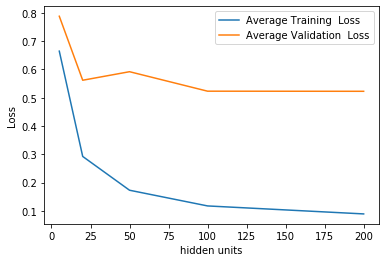

In [24]:
plt.plot(units,losses[:,0], label = "Average Training  Loss " )
plt.plot(units, losses[:,1], label = "Average Validation  Loss")
plt.xlabel('hidden units')
plt.ylabel('Loss')
plt.legend()
plt.show()

learning Rate

In [18]:
def train(model, train_iterator, test_iterator, optimizer, criterion, device, epochs = 100):
    avg_epoch = []
    avg_test_epoch = []
    
    for e in tqdm(range(epochs), desc = "Progress : ", position = 0, leave = True) : 
        epoch_loss = 0    
        model.train()
        epoch_test_loss = 0
        for (x, y) in train_iterator:

            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            y_pred= model(x.float())

            loss = criterion(y_pred, y)

            loss.backward()

            optimizer.step()

            epoch_loss += loss.item()
            
            test_loss = 0
            
            for (u,v) in test_iterator:
                y_test_pred = model(u.float())
                test_loss += criterion(y_test_pred, v).item()
            test_loss = test_loss/len(test_iterator)  
            epoch_test_loss += test_loss
#         print(epoch_test_loss/len(train_iterator) ,epoch_loss / len(train_iterator) )        
        avg_test_epoch.append(epoch_test_loss/len(train_iterator))      
        avg_epoch.append(epoch_loss / len(train_iterator))
        
    return avg_epoch, avg_test_epoch

In [19]:
lrs = [0.1,0.01,0.001]
history = {}
for l in lrs :
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = NeuralNet(input_size, 4, num_classes).to(device)

    optimizer = optim.Adam(model.parameters(), lr = l)
    criterion = nn.CrossEntropyLoss().to(device)
    print("Model for l = ", l)
    train_loss, test_loss = train(model,trainloader,testloader, optimizer , criterion, device)
    history[l] = (train_loss, test_loss)
    print("Average Training Loss : ", sum(train_loss)/len(train_loss))
    print("Average Validation Loss : ", sum(test_loss)/len(test_loss))

Model for l =  0.1


Progress : 100%|█████████████████████████████████████████████████████████████████████| 100/100 [10:26<00:00,  6.27s/it]


Average Training Loss :  0.7658797559473253
Average Validation Loss :  0.873876634173923
Model for l =  0.01


Progress : 100%|█████████████████████████████████████████████████████████████████████| 100/100 [10:20<00:00,  6.21s/it]


Average Training Loss :  0.7438545272747673
Average Validation Loss :  0.8700967090990807
Model for l =  0.001


Progress : 100%|█████████████████████████████████████████████████████████████████████| 100/100 [09:51<00:00,  5.92s/it]


Average Training Loss :  1.2285192669100238
Average Validation Loss :  1.2975009656283591


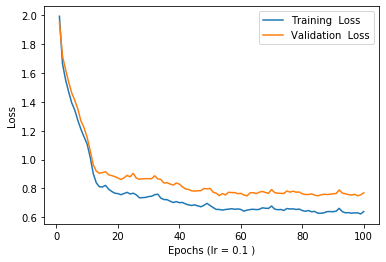

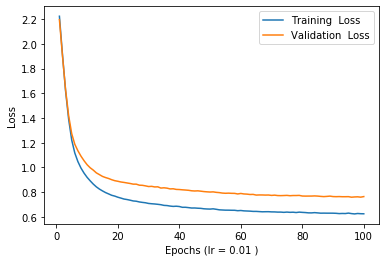

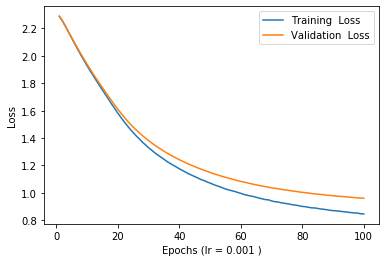

In [27]:
for key in list(history.keys()):
    plt.plot([x for x in range(1,101,1)],history[key][0], label = "Training  Loss " )
    plt.plot([x for x in range(1,101,1)], history[key][1], label = "Validation  Loss")
    plt.ylabel('Loss')
    plt.xlabel('Epochs (lr = ' + str(key) + " )")
    plt.legend()
    plt.show()

In [31]:
# import pickle
# f = open("picklefiles/Q3.1", "wb")
# pickle.dump(losses,f)
# f.close()

In [32]:
# f = open("picklefiles/Q3.2", "wb")
# pickle.dump(history,f)
# f.close()